In [4]:
import numpy as np
import csv
import random
import matplotlib.pyplot as plt

random.seed(0)
cantArchivosGenerados = 1600

In [17]:
def generarArchivo(nombre, tamanio):
    archivo = open("inputs/" + nombre, "w")
    for i in range(tamanio):
        ## longitud promedio = ~5 letras
        palabra = "".join([chr(random.randint(ord('a'), ord('z'))) for _ in range(random.randint(2, 10))])
        archivo.write(palabra + '\n')
    archivo.close()
    
def leer_csv(path):
    with open(path) as csvfile:
        filas = csv.reader(csvfile)
        filas = list(filas)[1:]
    tiempo_archivos = [float(f[1]) for f in filas]
    tiempo_maximo = [float(f[2]) for f in filas]
    return ([int(f[0]) for f in filas], tiempo_archivos, tiempo_maximo)

Generamos `cantArchivos` archivos con una cantidad aleatoria de palabras entre 5 y 500

In [6]:
for i in range(cantArchivosGenerados):
    generarArchivo("archivo-" + str(i), random.randint(1, 100) * 5)

En este primer experimento, analizamos el output de la ejecución del programa en C++, que toma como input los archivos generados en el paso anterior, y que consiste en medir el tiempo de ejecucion del programa dejando fija la cantidad de archivos y modificando la cantidad de threads en cada ejecucion

In [18]:
cantArchivos = 800
path = f'outputs/experimento-1/tiempos-{cantArchivos}.csv'
(threads, tiempo_archivos, tiempo_maximo) = leer_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/experimento-1/tiempos-800.csv'

In [ ]:
plt.xscale("log", base = 2)
plt.plot(threads, tiempo_archivos)
plt.plot(threads, [tiempo_archivos[0]] * len(threads))
plt.xlabel("Cantidad de threads")
plt.ylabel("Tiempo de ejecucion (s)")

In [ ]:
plt.xscale("log", base = 2)
plt.plot(threads, tiempo_maximo)
plt.plot(threads, [tiempo_maximo[0]] * len(threads))
plt.xlabel("Cantidad de threads")
plt.ylabel("Tiempo de ejecucion (s)")

Para el segundo experimento, observamos el tiempo de ejecucion del programa dejando fija la cantidad de threads y modificando la cantidad de archivos en cada ejecucion.

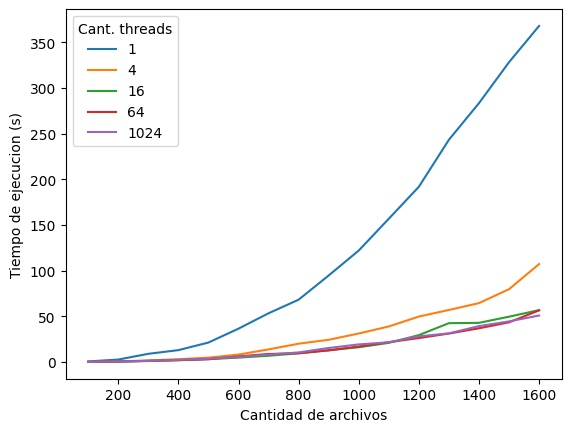

In [40]:
threads = [1, 4, 16, 64, 1024]
for cantThreads in threads:
    (archivos, tiempo_archivos, _) = leer_csv(f'experimento-2/outputs/tiempos-{cantArchivosGenerados}-{cantThreads}.csv')
    plt.plot(archivos, tiempo_archivos)
plt.xlabel("Cantidad de archivos")
plt.ylabel("Tiempo de ejecucion (s)")
plt.legend(threads, title="Cant. threads")

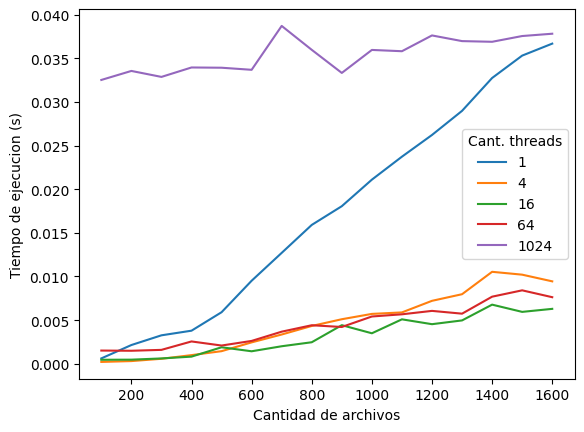

In [50]:
threads = [1, 4, 16, 64]
for cantThreads in threads:
    (archivos, _, tiempo_maximo) = leer_csv(f'experimento-2/outputs/tiempos-{cantArchivosGenerados}-{cantThreads}.csv')
    plt.plot(archivos, [t / 30 for t in tiempo_maximo])
(archivos, _, tiempo_maximo) = leer_csv(f'experimento-2/outputs/tiempos-{cantArchivosGenerados}-1024.csv')
plt.plot(archivos, [t / 150 for t in tiempo_maximo])
plt.xlabel("Cantidad de archivos")
plt.ylabel("Tiempo de ejecucion (s)")
plt.legend(threads + [1024], title="Cant. threads")